In [1]:
run /home/keir/Software/lya_emulator/main.py /share/hypatia/sbird/Lya_Boss /home/keir/Plots/Emulator hires_s8_new /home/keir/Data/emulator


/share/apps/anaconda/python3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Beginning to initialise LikelihoodClass at 2018-09-07 14:29:28.389453
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b6fcaee5048>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b6fcbfd72e8>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b6fcaedcfd0>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b6f9eb4bcc0>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b6f77bd5128>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b6fcbfd3e80>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b6fcbfd3fd0>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b6fcbfe0080>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b6fcbfe0198>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b6fcbfe0278>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b6fcbfe0358>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b6fcbfe0860>
Found spectra in <fake_spectra.spectra.Spectra object 

Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7142cfc518>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7142cfc470>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7142cfc240>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7142cfc748>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7142cfc898>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7142cfc978>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7142cfca58>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7142cfca90>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7142cfcb70>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7142cfcd30>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7142cfcc88>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7142cfce10>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7142cfcf28>
Found spectra in <fake_spectra.spectra.Spectra obje

Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7145c8cf28>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7145c8cfd0>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7148ca2160>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7148ca2240>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7148ca2320>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7148ca2400>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7148ca24e0>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7148ca25c0>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7148ca26a0>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7148ca2780>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b7148ca2860>
Number of redshifts for emulator generation = 11
  linear.    |  value  |  constraints  |  priors
  variances  |    1.0  |      +ve      |        
  sum.              |  value  |  constraints  |  p

  linear.    |  value  |  constraints  |  priors
  variances  |    1.0  |      +ve      |        
  sum.              |  value  |  constraints  |  priors
  linear.variances  |    1.0  |      +ve      |        
  rbf.variance      |    1.0  |      +ve      |        
  rbf.lengthscale   |    1.0  |      +ve      |        
Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s05  0006  -4.618495e+04   8.627801e+04 
    00s17  0019  -4.628831e+04   5.968570e+03 
    00s19  0021  -4.629175e+04   3.487127e+02 
    00s32  0038  -4.629322e+04   5.742179e-02 
Runtime:     00s32
Optimization status: Converged


Name : GP regression
Objective : -46293.21604695847
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  sum.linear.variances     |    0.13436746614283657  |      +ve      |        
  sum.rbf.variance         |     1.35358130597

In [ ]:
run /home/keir/Software/lya_emulator/main.py /home/keir/Data/emulator /home/keir/Plots/Emulator hot_cold_training3_rescale_2000 /home/keir/Data/emulator

In [2]:
#import multiprocessing as mu
#import corner as co
#import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
posterior_samples = np.loadtxt('/home/keir/Data/emulator/AA0.97BB1.3_chain_hires_s8_rescale_20000.txt')

In [ ]:
output[0].param_limits

In [ ]:
acquisition_function_tau0_amp = output.make_grid_acquisition_function(1, 2, samples=30000, nu=1., exploitation_weight=0.)
acquisition_function_tau0_amp[acquisition_function_tau0_amp == 0.] = np.nan

In [ ]:
acquisition_function_tau0_amp_exploit = output.make_grid_acquisition_function(0, 2, samples=1000, nu=0., exploitation_weight=1.)
acquisition_function_tau0_amp_exploit[acquisition_function_tau0_amp_exploit == 0.] = np.nan

In [ ]:
plt.contour(np.log10(acquisition_function_tau0_amp).T, 100, extent=[0.75, 1.25, 0.8, 1.2], origin='image')
plt.colorbar()

In [ ]:
plt.imshow(np.exp(acquisition_function_tau0_amp).T, extent=[-0.25, 0.25, 0.8, 1.2])
plt.colorbar()

In [ ]:
plt.figure(figsize=(18, 18))
plt.imshow(np.exp(acquisition_function_tau0_amp_exploit - np.nanmax(acquisition_function_tau0_amp_exploit)).T, extent=[-0.25, 0.25, 0.8, 1.2])
plt.colorbar()
#plt.scatter(0.95, 0.95, color='red')

In [ ]:
acquisition_function_exploit = output.acquisition_function_GP_UCB_marginalised_mean_flux(np.array([0.95,]), nu=1., exploitation_weight=0.)
acquisition_function_exploit = output.acquisition_function_GP_UCB_marginalised_mean_flux(np.array([0.9,]), nu=1., exploitation_weight=0.)
acquisition_function_exploit = output.acquisition_function_GP_UCB_marginalised_mean_flux(np.array([1.,]), nu=1., exploitation_weight=0.)

In [ ]:
acquisition_function_exploit = output.acquisition_function_GP_UCB_marginalised_mean_flux(np.array([0.95,]), nu=1., exploitation_weight=1.)
acquisition_function_exploit = output.acquisition_function_GP_UCB_marginalised_mean_flux(np.array([0.95,]), nu=0., exploitation_weight=1.)


In [ ]:
output[0].acquisition_function_GP_UCB_marginalised_mean_flux(np.array([0.81,]), nu=1., exploitation_weight=None)


In [ ]:
print(np.mean(output[0]._get_emulator_error_averaged_mean_flux(np.array([0.81,]))))

_ = output[0].likelihood(np.array([0., 0.95, 0.81]))
print(np.mean(output[0].emulated_flux_power_std[0]))

print(np.mean(output[0].emulated_flux_power_std[0]) / np.mean(output[0].emulated_flux_power[0]))

In [ ]:
output.cur_results.flatchain.shape

In [ ]:
output.cur_results.get_lnprob(np.array([0., 0.95, 0.95]))

In [ ]:
print(posterior_samples.shape)

In [ ]:
histogram_output = sb.kdeplot(posterior_samples[:, 2]).get_lines()[0].get_data()

In [ ]:
histogram_output = plt.hist(posterior_samples[:, 2], bins='auto', normed=True, histtype='step', log=True)
print(histogram_output)
plt.axvline(x=0.92)


In [ ]:
print(histogram_output[0].shape)
print(histogram_output[1].shape)
print(histogram_output)

In [ ]:
#n_samples = 200
parameter_samples = (histogram_output[1][:-1] + histogram_output[1][1:]) / 2. #np.linspace(output[0].param_limits[2, 0], output[0].param_limits[2, 1], num=n_samples)
acquisition_function_exploit_array = np.zeros_like(parameter_samples)
for i in range(parameter_samples.shape[0]):
    acquisition_function_exploit_array[i] = output[0].acquisition_function_GP_UCB_marginalised_mean_flux(np.array([parameter_samples[i],]), nu=1., exploitation_weight=None)


In [ ]:
#n_samples = 200
parameter_samples2 = histogram_output[0] #np.linspace(output[0].param_limits[2, 0], output[0].param_limits[2, 1], num=n_samples)
acquisition_function_exploit_array2 = np.zeros_like(parameter_samples2)
for i in range(parameter_samples2.shape[0]):
    acquisition_function_exploit_array2[i] = output[0].acquisition_function_GP_UCB_marginalised_mean_flux(np.array([parameter_samples2[i],]), nu=1., exploitation_weight=None)


In [ ]:
plt.plot(parameter_samples2, np.log(histogram_output[1] / np.max(histogram_output[1])))
plt.xlim([0.89, 1.11])
plt.ylim([-2.5, 0.1])

In [ ]:
plt.plot(parameter_samples2, 100*acquisition_function_exploit_array2[:parameter_samples2.shape[0]])
plt.axvline(x=0.9, color='black', ls=':')
plt.axvline(x=1., color='black', ls=':')
plt.axvline(x=1.1, color='black', ls=':')
plt.xlim([0.89, 1.11])
plt.ylim([0., 0.2])

In [ ]:
plt.plot(parameter_samples2, np.log(histogram_output[1] / np.max(histogram_output[1])), label=r'Exploitation term')
plt.plot(parameter_samples2, 100*acquisition_function_exploit_array2[:parameter_samples2.shape[0]], label=r'Exploration term')
plt.plot(parameter_samples2, np.log(histogram_output[1] / np.max(histogram_output[1])) + 100.*acquisition_function_exploit_array2[:parameter_samples2.shape[0]], label=r'GP-UCB acquisition function')

plt.legend(frameon=False)
#plt.axvline(x=0.9, color='black', ls=':')
plt.axvline(x=0.92, color='blue', ls=':')
plt.axvline(x=0.925, color='green', ls=':')
#plt.axvline(x=0.95, color='black', ls=':')
plt.xlim([0.89, 0.95])
plt.ylim([-0.1, 0.2])
plt.xlabel(r'heat amp')

In [ ]:
output[0].param_limits[0] = np.array([-0.24, 0.24])
print(output[0].param_limits)
output[0].log_likelihood_marginalised_mean_flux(np.array([0.95,]), integration_method='Monte-Carlo', integration_options=6000)


In [ ]:
#output[0].param_limits[0] = np.array([-0.007, 0.007])
#output[0].param_limits[1] = np.array([0.948, 0.952])

integration_bounds = [[-0.08, 0.08], [0.936, 0.964]]

#mmh.dps = 50
integration_instance = mmh.calculus.quadrature.GaussLegendre
print(integration_instance)

likelihood_marginalised = np.zeros(10)
exploration_term = np.zeros_like(likelihood_marginalised)
#parameter_samples = np.linspace(output[0].param_limits[2, 0] + 0.01, output[0].param_limits[2, 1], num=likelihood_marginalised.shape[0], endpoint=False)
parameter_samples = np.linspace(0.912, 0.928, num=likelihood_marginalised.shape[0])
for i in range(likelihood_marginalised.shape[0]):
    parameter_vector = np.array([parameter_samples[i],])
    #likelihood_marginalised[i] = output[0].log_likelihood_marginalised_mean_flux(np.array([parameter_samples[i],]), integration_method='Quadrature', integration_options=integration_instance)
    likelihood_marginalised[i] = output[0].acquisition_function_GP_UCB_marginalised_mean_flux(parameter_vector, nu=0., integration_options='gauss-legendre', integration_bounds=integration_bounds)
    exploration_term[i] = output[0].acquisition_function_GP_UCB_marginalised_mean_flux(parameter_vector, exploitation_weight=None, nu=1.e4)


In [ ]:
plt.scatter(parameter_samples, likelihood_marginalised)


In [ ]:
plt.scatter(parameter_samples, likelihood_marginalised - np.nanmax(likelihood_marginalised))
plt.scatter(parameter_samples, exploration_term, color='red')
plt.plot(histogram_output[0], np.log(histogram_output[1] / np.nanmax(histogram_output[1])), color='blue')
plt.axvline(x=0.92)
plt.xlim([0.89, 0.95])
plt.ylim([-0.2, 0.2])

In [ ]:
plt.scatter(parameter_samples, likelihood_marginalised - np.nanmax(likelihood_marginalised), color='red')
#sb.kdeplot(posterior_samples[:, 2])
plt.plot(histogram_output[0], np.log(histogram_output[1] / np.nanmax(histogram_output[1])))
plt.axvline(x=0.92, color='black')
plt.xlim([0.91, 0.93])
plt.ylim([-0.01, 0.01])

In [ ]:
plt.scatter(parameter_samples, np.exp(likelihood_marginalised - np.nanmax(likelihood_marginalised)), color='red')
#sb.kdeplot(posterior_samples[:, 2])
plt.plot(histogram_output[0], histogram_output[1] / np.nanmax(histogram_output[1]))
plt.axvline(x=0.92, color='black')
plt.xlim([0.8, 1.2])

In [ ]:
integration_bounds = [[-0.08, 0.08], [0.936, 0.964]]

acquisition_optimisation = output[0].optimise_acquisition_function(np.array([1.1,]), optimisation_bounds=[(0.81, 1.19),], nu=0., integration_bounds=integration_bounds)


In [ ]:
print(acquisition_optimisation.x)
print(acquisition_optimisation.success)
print(acquisition_optimisation.message)

In [ ]:
parameter_truth = np.array([0., 0.95, 0.975, 2.25e-09, 0.08333333333333326, 0.9166666666666666, 0.6916666666666667])

In [ ]:
optimisation_bounds = [tuple(output[0].param_limits[i]) for i in range(parameter_truth.shape[0])]
print(optimisation_bounds)
optimisation_bounds_unit_cube = [(1.e-7, 1. - 1.e-7) for i in range(parameter_truth.shape[0] - 2)]
print(optimisation_bounds_unit_cube)


In [ ]:
integration_bounds = [[-0.2, 0.2], [0.85, 1.05]]

#parameter_truth = parameter_truth * 1.01
#print(parameter_truth)
#parameter_truth_unit_cube = map_to_unit_cube(parameter_truth, output[0].param_limits)
parameter_truth_unit_cube = 1.e-7 + npr.rand(5) * (1. - 2.e-7)
print(parameter_truth_unit_cube)

def likelihood_function(parameter_vector):
    print(parameter_vector, map_from_unit_cube(parameter_vector, output[0].param_limits[2:]))
    likelihood_evaluation = -1. * output[0].log_likelihood_marginalised_mean_flux(map_from_unit_cube(parameter_vector, output[0].param_limits[2:]), integration_bounds=integration_bounds)
    print(likelihood_evaluation)
    return likelihood_evaluation

#acquisition_optimisation = spo.minimize(likelihood_function, parameter_truth_unit_cube, bounds=optimisation_bounds_unit_cube, options={'disp': True})
acquisition_optimisation = spo.basinhopping(likelihood_function, parameter_truth_unit_cube, minimizer_kwargs={'bounds': optimisation_bounds_unit_cube, 'options': {'disp': True}}, disp=True)

print(acquisition_optimisation.x)
print(acquisition_optimisation.success)
print(acquisition_optimisation.message)

print(map_from_unit_cube(acquisition_optimisation.x, output[0].param_limits[2:]))
#print(map_from_unit_cube(acquisition_optimisation.x, output[0].param_limits) - parameter_truth)

In [ ]:
pool_instance.close()
#pool_instance.join()
del pool_instance

n_process = 8

integration_bounds = [[-0.2, 0.2], [0.85, 1.05]]

def likelihood_function(parameter_vector):
    #print(parameter_vector, map_from_unit_cube(parameter_vector, output[0].param_limits[2:]))
    likelihood_evaluation = -1. * output[0].log_likelihood_marginalised_mean_flux(map_from_unit_cube(parameter_vector, output[0].param_limits[2:]), integration_bounds=integration_bounds)
    #print(likelihood_evaluation)
    return likelihood_evaluation

def optimisation_function(optimisation_arguments):
    false_number, parameter_truth_unit_cube = optimisation_arguments

    acquisition_optimisation = spo.minimize(likelihood_function, parameter_truth_unit_cube, bounds=optimisation_bounds_unit_cube, options={'disp': False})
    #print(acquisition_optimisation.success)
    #print(acquisition_optimisation.message)
    return acquisition_optimisation.x
#acquisition_optimisation = spo.basinhopping(likelihood_function, parameter_truth_unit_cube, minimizer_kwargs={'bounds': optimisation_bounds_unit_cube, 'options': {'disp': True}}, disp=True)

optimisation_arguments_list = [(0., 1.e-7 + npr.rand(5) * (1. - 2.e-7)) for i in range(n_process)]
print(optimisation_arguments_list)
pool_instance = mu.Pool(n_process)
optimisation_results = pool_instance.map(optimisation_function, optimisation_arguments_list)


In [ ]:
[-5.86448758e-02  9.64476445e-01  9.88091992e-01  2.40207473e-09
  1.30284380e-01  1.06729539e+00  6.91094030e-01]
[-6.73717605e-02  9.79216137e-01  9.86009810e-01  2.36946453e-09
  1.88449411e-01  9.78980755e-01  6.89627409e-01]
[-7.77305181e-03  9.28751149e-01  9.89338079e-01  2.24040312e-09
 -1.96653971e-02  1.28341469e+00  6.88152784e-01]

In [13]:
n_process = 55
n_parameters = 7
n_marginalised_parameters = 2

optimisation_bounds_unscaled = np.array([[0.93, 1.04], [1.5e-9, 2.9e-9], [-0.4, 0.4], [0.77, 1.43], [0.66, 0.74]])
#optimisation_bounds_unscaled = np.array([[0.96, 1.02], [1.8e-9, 2.7e-9], [-0.2, 0.3], [0.9, 1.4], [0.67, 0.72]])
print(optimisation_bounds_unscaled)
optimisation_bounds_array = np.zeros_like(optimisation_bounds_unscaled)
optimisation_bounds_array[:, 0] = map_to_unit_cube(optimisation_bounds_unscaled[:, 0], output[0].param_limits[n_marginalised_parameters:])
optimisation_bounds_array[:, 1] = map_to_unit_cube(optimisation_bounds_unscaled[:, 1], output[0].param_limits[n_marginalised_parameters:])

#optimisation_bounds_array = np.ones((n_parameters - n_marginalised_parameters, 2))
#optimisation_bounds_array[:, 0] *= 1.e-7
#optimisation_bounds_array[:, 1] *= 1. - 1.e-7

print(optimisation_bounds_array)
optimisation_bounds = [tuple(optimisation_bounds_array[i]) for i in range(n_parameters - n_marginalised_parameters)]
print(optimisation_bounds)

starting_positions = np.array([npr.uniform(low=optimisation_bounds_array[:, 0], high=optimisation_bounds_array[:, 1]) for i in range(n_process)])
#print(starting_positions)


[[ 9.30e-01  1.04e+00]
 [ 1.50e-09  2.90e-09]
 [-4.00e-01  4.00e-01]
 [ 7.70e-01  1.43e+00]
 [ 6.60e-01  7.40e-01]]
[[0.36666667 0.48888889]
 [0.16666667 0.94444444]
 [0.1        0.9       ]
 [0.27       0.93      ]
 [0.1        0.9       ]]
[(0.36666666666666675, 0.48888888888888893), (0.16666666666666666, 0.9444444444444444), (0.09999999999999998, 0.9), (0.27, 0.9299999999999999), (0.10000000000000012, 0.8999999999999999)]


In [14]:
import multiprocessing as mg
mg.set_start_method('forkserver', force=True)

import acquisition as ac

#starting_positions = 1.e-7 + npr.rand(n_process, n_parameters - n_marginalised_parameters) * (1. - 2.e-7)
#optimisation_bounds = [(1.e-7, 1. - 1.e-7) for i in range(n_parameters - n_marginalised_parameters)]
#integration_bounds = [list(output[0].param_limits[0]), list(output[0].param_limits[1])]
integration_bounds = [[-0.2, 0.2], [0.85, 1.05]]
argument_list = [(starting_positions[i], output[0], optimisation_bounds, 0.1, 1., integration_bounds) for i in range(n_process)]

pool_instance = mg.Pool(n_process)
optimisation_output = pool_instance.map(ac.optimise_acquisition_function_parallel, argument_list)

[print(map_from_unit_cube(optimisation_output[i].x, output[0].param_limits[n_marginalised_parameters:])) for i in range(n_process)]


[ 9.85633649e-01  1.81256065e-09 -1.74753453e-02  1.06882140e+00
  7.05604518e-01]
[ 9.87953369e-01  1.95506154e-09 -6.96696927e-02  1.31206233e+00
  6.84927876e-01]
[ 9.77476646e-01  2.26152634e-09 -2.05941907e-01  1.32425486e+00
  6.86279791e-01]
[ 9.87940480e-01  1.95571351e-09 -6.92403851e-02  1.31211977e+00
  6.84901501e-01]
[ 9.77437206e-01  2.26206748e-09 -2.05837963e-01  1.32445968e+00
  6.86296085e-01]
[ 9.82148779e-01  1.83867117e-09 -2.30309262e-01  1.39706900e+00
  6.76413344e-01]
[ 9.88013441e-01  1.95543336e-09 -6.89106728e-02  1.31178179e+00
  6.84821411e-01]
[ 9.85700425e-01  1.81198015e-09 -1.73707692e-02  1.06994638e+00
  7.05554846e-01]
[9.90628718e-01 2.31075136e-09 3.54958354e-01 9.06714668e-01
 6.96360191e-01]
[ 9.90427461e-01  2.44940454e-09 -1.23245183e-02  1.24376428e+00
  6.88305966e-01]
[ 9.88047549e-01  1.95405036e-09 -6.89865634e-02  1.31220351e+00
  6.84724515e-01]
[9.90650703e-01 2.30975720e-09 3.55031976e-01 9.06358112e-01
 6.96305228e-01]
[9.85023713e-0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [15]:
[print(optimisation_output[i].fun) for i in range(n_process)]

[print(map_from_unit_cube(starting_positions[i], output[0].param_limits[n_marginalised_parameters:])) for i in range(n_process)]

best_process = np.argmin(np.array([optimisation_output[i].fun for i in range(n_process)]))
print(best_process, map_from_unit_cube(optimisation_output[best_process].x, output[0].param_limits[n_marginalised_parameters:]))


1436.7059277235448
1433.9434343974606
1434.259932424615
1433.9433584188453
1434.2598956993622
1437.8235238616157
1433.9433206324563
1436.7059280385722
1436.7152892212598
1434.4550587093386
1433.9433281967626
1436.7153382905606
1433.3208858206037
1444.2182491570975
1436.7059530244505
1436.7153464316211
1433.32213237153
1436.7060022942762
1436.7059276544164
1433.9434309097917
1433.320790358978
1436.705999632149
1433.3208450987802
1434.4552604718883
1433.9432986826391
1436.7061268580323
1434.260068569189
1439.0239102922587
1433.943455190255
1441.207776617617
1434.2598658007776
1434.4550508521336
1436.7619936685182
1433.9433251132514
1438.4399068160287
1436.761326398704
1434.2600093431968
1453.2988112931835
1433.9434077870094
1444.2182491570975
1433.9433003878942
1434.2599162456186
1433.3207880492444
1436.7153972621188
1436.7152900144044
1433.320796971915
1433.9434321208364
1434.4553574564782
1438.7529961645862
1439.1631821119788
1434.2598813172833
1433.9433075722304
1433.9432995482043
143

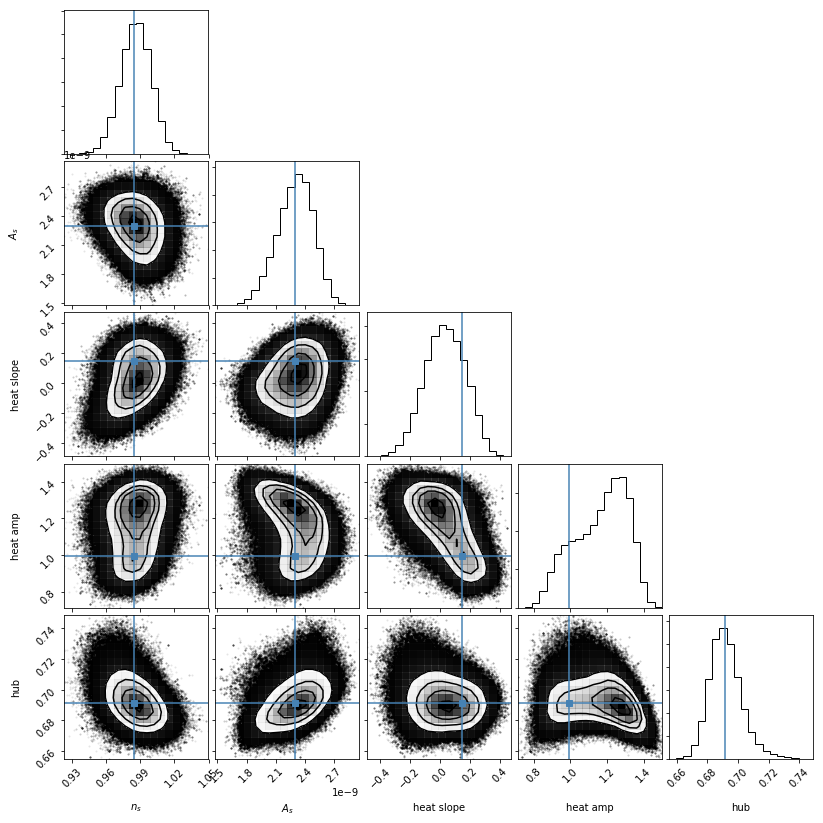

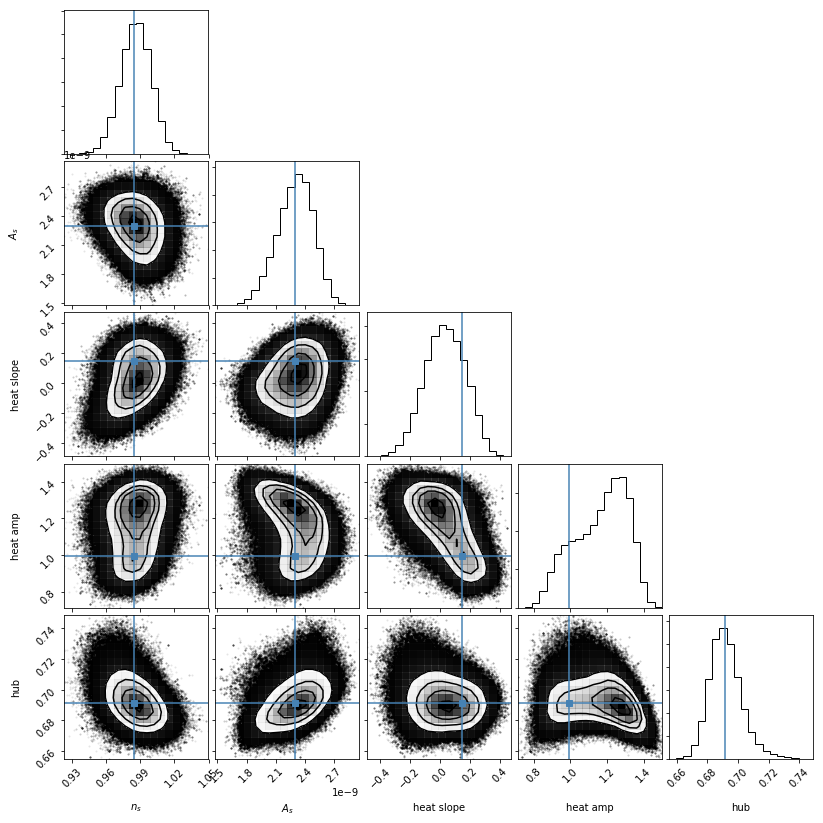

In [16]:
import corner as co

corner_plot_labels = [r'$d\tau_0$', r'$\tau_0$', r'$n_s$', r'$A_s$', 'heat slope', 'heat amp', 'hub']

co.corner(posterior_samples[:, n_marginalised_parameters:], labels=corner_plot_labels[n_marginalised_parameters:], truths=np.concatenate(([], map_from_unit_cube(optimisation_output[best_process].x, output[0].param_limits[n_marginalised_parameters:]))))


In [ ]:
[9.92761335e-01 2.42336688e-09 3.53231102e-02 1.24026185e+00
 6.90070110e-01]
[9.98922713e-01 1.78991408e-09 2.00561918e-01 8.91035270e-01
 7.16109410e-01]
[1.01805673e+00 1.55893077e-09 3.39285232e-01 8.39858390e-01
 7.28723550e-01]
[ 9.76096007e-01  2.27948154e-09 -2.11387489e-01  1.32066491e+00
  6.88386399e-01]

In [ ]:
import numpy as np
from scipy import optimize
from multiprocessing import Pool
#del emcee
import scipy
import numpy.linalg as npl
import corner

def square(x):
    print(x)
    print(np.linalg.pinv(np.eye(2)))
    return np.sum(x**2+ 2*x)

def minimize(args):
    f,x = args
    res = optimize.minimize(f, x, method = 'L-BFGS-B')
    return res.x

x = np.random.rand(8,10)

args = [(square,x[i]) for i in range(8)]
p = Pool(8)
p.map(minimize,args)

In [ ]:
#from scipy import optimize
#from multiprocessing import Pool
#import multiprocessing
#multiprocessing.set_start_method('forkserver')

n_process = 1
n_parameters = 7

output[0].random_function = 1.

class FunctionClass(object):
    def __init__(self):
        pass

    def function_evaluation(self, parameters):
        #return np.sum(parameters**2+ 2*parameters)
        #return output[0].random_function
        print('Evaluating likelihood function')
        tau0_factors = mflux.mean_flux_slope_to_factor(output[0].zout, parameters[0])
        emulator_output = (output[0].gpemu.kf, output[0].gpemu.nk, output[0].gpemu.nz, output[0].gpemu.coreg)
        emulator_output2 = (output[0].gpemu.gps[0].params, output[0].gpemu.gps[0].param_limits, output[0].gpemu.gps[0].intol, output[0].gpemu.gps[0]._test_interp, output[0].gpemu.gps[0].coreg)
        emulator_output3 = (output[0].gpemu.gps[0].scalefactors, output[0].gpemu.gps[0].paramzero)
        parameters_unit_cube = map_to_unit_cube(parameters[1:], output[0].gpemu.gps[0].param_limits)
        #numpy_output = np.linalg.pinv(np.eye(2))
        #emulator_output4 = output[0].gpemu.gps[0].gp.optimize(messages=True)
        #.predict(parameters_unit_cube.reshape(1, -1))
        #emulator_output2 = output[0].gpemu.gps[0].predict(parameters[1:].reshape(1, -1))
        #function_predicted, function_std = output[0].gpemu.predict(np.array(parameters[1:]).reshape(1, -1), tau0_factors=tau0_factors)
        #full_output = output[0].likelihood(parameters)
        print('Finished evaluating likelihood function')
        #full_output = output[0].get_BOSS_covariance_single_z(output[0].zout[0])
        #full_output = output[0].
        #print(full_output)
        full_output = 1.
        return np.mean(full_output)

function_class_instance = FunctionClass()

def optimisation_function(parameter_vector):
    print('parameter_vector =', parameter_vector)
    #eturn np.sum(parameter_vector**2+ 2*parameter_vector)
    return function_class_instance.function_evaluation(parameter_vector)
    #return output[0].random_function
    #return -1. * output[0].likelihood(parameter_vector)
    #return -1. * output[0].log_likelihood_marginalised_mean_flux(parameter_vector)

def get_prior_limits():
    #prior_limits = np.ones((5, 2))
    #prior_limits[:, 0] *= -1.5
    #prior_limits[:, 1] *= -0.5
    #return prior_limits
    return output[0].param_limits[7 - n_parameters:]

def get_optimisation_function(x):
    print('x in get_optimisation_function =', x)
    #prior_limits = np.ones((5, 2))
    #prior_limits[:, 0] *= -1.5
    #prior_limits[:, 1] *= -0.5
    prior_limits = get_prior_limits()
    x_unscaled = map_from_unit_cube(x, prior_limits)
    print('x_unscaled in get_optimisation_function =', x_unscaled)
    return optimisation_function(x_unscaled)
    #return np.sum(x_unscaled**2+ 2*x_unscaled)
    #return output[0].log_likelihood_marginalised_mean_flux(x_unscaled)

def minimize(args):
    x_bounds = [[1.e-7, 1. - 1.e-7] for i in range(n_parameters)] #For unit hypercube
    f, x = args
    res = spo.minimize(f, x, method = 'L-BFGS-B', bounds=x_bounds, options={'disp': True})
    return res.x

x = 1.e-7 + np.random.rand(n_process, n_parameters) * (1. - 2.e-7) #Starting positions
print('x (starting positions) =', x)

args = [(get_optimisation_function, x[i]) for i in range(n_process)]
p = mu.Pool(n_process)
optimisation_result = p.map(minimize, args)
#optimisation_result = list(map(minimize, args)) #p.
print('optimisation_result =', optimisation_result)

optimisation_result_rescaled = [map_from_unit_cube(optimisation_result[i], get_prior_limits()) for i in range(n_process)]
print('optimisation_result_rescaled =', optimisation_result_rescaled)
print(np.array(optimisation_result) - np.array(x))


In [ ]:
list(map(minimize, args))

In [ ]:
output[0].gpemu.gps